In [1]:
import pandas as pd

In [36]:
data=pd.read_csv("dataDraft1.csv")
data

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,Left,Forward,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,Right,Forward,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,Right,Forward,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,Right,GK,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,Right,MidFielder,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17913,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,Right,MidFielder,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
17914,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,Right,Forward,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
17915,241638,B. Worman,16,England,47,67,Cambridge United,60.0,Right,Forward,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
17916,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,Right,Forward,...,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


In [23]:
potential_overall = data.iloc[:, [4, 5]]
potential_overall

,Overall,Potential
0,94,94
1,94,94
2,92,93
3,91,93
4,91,92
...,...,...
17913,47,65
17914,47,63
17915,47,67
17916,47,66


In [24]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=3).fit(potential_overall)
labels=pd.DataFrame(kmeans.labels_)
labels

D:\Program_Anaconda\envs\dminno\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,0
0,2
1,2
2,2
3,2
4,2
...,...
17913,0
17914,0
17915,0
17916,0


In [25]:
plotdata = data.iloc[:, [1, 4, 5]]
plotdata['label'] = labels
plotdata

C:\Users\Amaan Mansuri\AppData\Local\Temp\ipykernel_15016\1247456092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plotdata['label'] = labels


,Name,Overall,Potential,label
0,L. Messi,94,94,2
1,Cristiano Ronaldo,94,94,2
2,Neymar Jr,92,93,2
3,De Gea,91,93,2
4,K. De Bruyne,91,92,2
...,...,...,...,...
17913,J. Lundstram,47,65,0
17914,N. Christoffersson,47,63,0
17915,B. Worman,47,67,0
17916,D. Walker-Rice,47,66,0


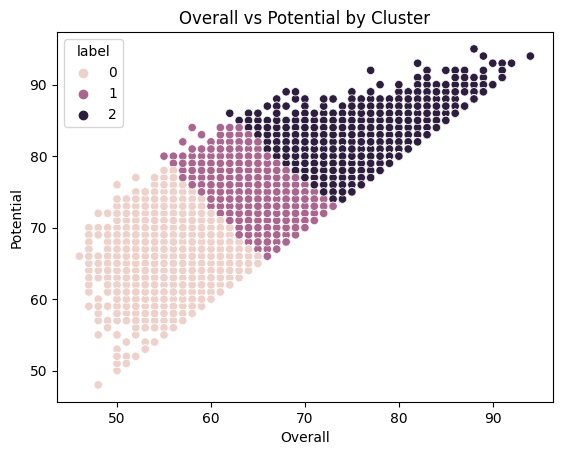

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# assuming you have a dataframe named 'df' with columns 'Potential', 'Overall' and 'Cluster'
sns.scatterplot(x=plotdata['Overall'], y=plotdata['Potential'], hue=plotdata['label'], data=plotdata)
plt.title('Overall vs Potential by Cluster')
plt.show()

In [34]:
labels.value_counts()

1    8392
0    5755
2    3771
Name: count, dtype: int64

In [16]:
# Mapping for good ,medium and avg player to corresponding indexs

dic={}
dic['good']=0
dic['avg']=7650
dic['poor']=17750
dic

{'good': 0, 'avg': 7650, 'poor': 17750}

In [17]:
# finding the cluster id of the players
good=labels.iloc[dic['good'],0]
avg=labels.iloc[dic['avg'],0]
poor=labels.iloc[dic['poor'],0]

In [18]:
t1=(labels==good)
t2=(labels==poor)
t3=(labels==avg)
t2=t2.to_numpy()
t3=t3.to_numpy()
t1=t1.to_numpy()
print(len(t1),len(t2),len(t3))

17918 17918 17918


In [13]:
indgood=[]
indavg=[]
indpoor=[]
for i in range(len(t1)):
    if t1[i][0]==True:
        indgood.append(i)
    elif t2[i][0]==True:
        indpoor.append(i)
    else:
        indavg.append(i)

good_players=data.iloc[indgood,:]
avg_players=data.iloc[indavg,:]
poor_players=data.iloc[indpoor,:]

In [14]:
good_players.head()
avg_players.head()
poor_players.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
9770,186112,J. Akinde,28,England,65,65,Lincoln City,550.0,Right,Forward,...,70.0,58.0,37.0,33.0,31.0,12.0,15.0,6.0,14.0,16.0
9771,200449,D. McGregor,32,Scotland,65,65,Hibernian,300.0,Right,Defender,...,43.0,63.0,59.0,66.0,63.0,11.0,12.0,10.0,16.0,10.0
9774,236545,Teixeira José,28,Brazil,65,65,Pohang Steelers,425.0,Right,Defender,...,36.0,62.0,60.0,64.0,60.0,7.0,10.0,9.0,11.0,5.0
9775,188417,A. Fernández,32,Uruguay,65,65,San Martin de Tucumán,400.0,Right,MidFielder,...,59.0,65.0,45.0,53.0,46.0,8.0,8.0,6.0,11.0,13.0
9779,207619,W. Creavalle,27,Guyana,65,66,Philadelphia Union,500.0,Right,MidFielder,...,44.0,61.0,60.0,61.0,60.0,14.0,16.0,6.0,10.0,9.0
